# <center>JustDice</center>

In [2]:
%%html
<img src="JustDice.jpg">


## Introduction

#### JustDice is the global market leader building exciting app-discovery platforms for mobile gamers with more than 50 million users. In this notebook, we will explore a dataset provided by JustDice that contains information on app installations and ad revenue for their various apps.Our goal is to perform exploratory data analysis on this dataset to gain insights into the performance of JustDice's apps across different countries, networks, and devices.



## Questions to Explore

1. What is the distribution of app installations and revenue across different days of the week?
2. Are there any seasonal trends in app installations and revenue?
3. How do different client IDs compare in terms of app installations and revenue generated?
4. What is the distribution of app installations and revenue across different app IDs?
5. Are there any relationships between the country of installation and the type of device being used?
6. How do different types of devices (e.g. Android vs. iOS) compare in terms of app installations and revenue generated?
7. Are there any correlations between revenue, payouts, and ad spend?
8. Are there any significant differences in app performance across different networks?
9. Are there any relationships between app performance and the version of the device's operating system?
10. What is the distribution of ad spend across different networks and countries?
11. Are there any significant differences in ad performance across different networks and countries?
12. Are there any correlations between payouts, ads, and revenue?
13. Which networks are the most effective at driving app installs and generating revenue?
14. Which countries have the highest number of app installations and revenue?


### Importing required libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport
from pivottablejs import pivot_ui
from IPython.display import HTML

### Reading our datasets

In [4]:
df_ads =pd.read_csv(r"D:\JustDice\data (1)\adspend.csv")

In [5]:
df_ads

,event_date,country_id,network_id,client_id,value_usd
0,2022-01-01,1,10,71,4.680000
1,2022-01-01,1,10,94,223.439997
2,2022-01-01,1,10,104,0.800000
3,2022-01-01,1,10,121,4.870000
4,2022-01-01,1,10,174,1.300000
...,...,...,...,...,...
11958,2022-12-31,109,60,121,0.297000
11959,2022-12-31,109,60,154,0.116000
11960,2022-12-31,109,60,174,1.457000
11961,2022-12-31,109,60,189,0.225000


In [270]:
df_revenue=pd.read_csv(r"D:\JustDice\data (1)\revenue.csv")

In [271]:
df_revenue

,install_id,event_date,value_usd
0,213197bd66cd889d103ab9059709458e49808214837508...,2022-12-16,1.58000
1,251442e25a39fb706e242445db49498ba1d6762c1ff46e...,2022-12-21,6.75000
2,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,2022-12-21,1.62000
3,9505bab0515c96b7d8c9a5aeb1fb28ae397b23badb2f03...,2022-12-20,0.00150
4,fa69bdded229f9ebb18290559d77cefbd8e5ad83d74b86...,2022-12-16,0.54000
...,...,...,...
2629309,4356d41fe3eaf6b8519fe29268f3325b496ffccc50aa93...,2022-01-09,0.00200
2629310,4356d41fe3eaf6b8519fe29268f3325b496ffccc50aa93...,2022-01-09,0.02648
2629311,4356d41fe3eaf6b8519fe29268f3325b496ffccc50aa93...,2022-01-09,0.00200
2629312,ac1da1cd8464aa8206b4372578ef15a273e06db5227182...,2022-01-09,1.05000


In [8]:
df_installs=pd.read_csv(r"D:\JustDice\data (1)\installs.csv")

In [9]:
df_installs

,install_id,country_id,app_id,network_id,event_date,device_os_version
0,6b168a9f7a13119b87bfeb834d159f6879ff000205cb27...,1,174,26,2022-12-13,10
1,218ecd973c988fe76dfd247f92e9317485010844163a51...,1,174,60,2022-12-14,10
2,f67c1382fc3af8a24cb6f23bff381279d582eb67d4043e...,17,122,26,2022-12-30,11
3,afe4dc7c1663fba7ba3bc7cf6a308c38c1cb409d253f7f...,1,121,1111,2022-12-30,8.0.0
4,417acac6a6bdb88a83371f8ab482691d16896e8681afcb...,109,325,10,2022-12-05,11
...,...,...,...,...,...,...
216883,19be0a9a4458de0d52547e141df90507cf6432ff8ac512...,213,184,60,2022-01-08,10
216884,a39a5e320f0cad2c67184302a1e5deeea9c12a1fa9a34d...,109,121,60,2022-01-08,11
216885,e6a9b7812608a10ba6a5c654e33ee2482a4e6cd4f9ec2f...,109,121,26,2022-01-08,11
216886,e0fd2cee99c16389dd64ba242471d5709f64033b03fb08...,109,174,60,2022-01-08,10


In [10]:
df_payouts=pd.read_csv(r"D:\JustDice\data (1)\payouts.csv")

In [11]:
df_payouts

,install_id,event_date,value_usd
0,8912076a49c7b17960f8d262dc37599f86cbb3da8912b6...,2022-12-21,0.254376
1,7488c7b0f3d25cea61e435ea2aa346d3bbf1b946b94b1f...,2022-12-28,0.361216
2,66ee0cd1d490d9d352b46b443c9d5b5aa5bdabfbdb303b...,2022-12-10,0.359006
3,66ee0cd1d490d9d352b46b443c9d5b5aa5bdabfbdb303b...,2022-12-10,0.253416
4,66ee0cd1d490d9d352b46b443c9d5b5aa5bdabfbdb303b...,2022-12-10,0.253416
...,...,...,...
51998,f280f52a3e6e7e105204ae6e5533bdcf149371807f1b5e...,2022-01-26,1.910376
51999,5416f5bd483d76e684e0d3ed090fd10342c3168f0fa492...,2022-01-27,0.383418
52000,4fb5afa7d5dfd772e84bae4979a64fdf9cea75420294f1...,2022-01-26,0.757368
52001,4fb5afa7d5dfd772e84bae4979a64fdf9cea75420294f1...,2022-01-26,0.384336


In [12]:
df_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11963 entries, 0 to 11962
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   event_date  11963 non-null  object 
 1   country_id  11963 non-null  int64  
 2   network_id  11963 non-null  int64  
 3   client_id   11963 non-null  int64  
 4   value_usd   11963 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 467.4+ KB


In [13]:
df_ads.columns

Index(['event_date', 'country_id', 'network_id', 'client_id', 'value_usd'], dtype='object')

In [14]:
df_revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2629314 entries, 0 to 2629313
Data columns (total 3 columns):
 #   Column      Dtype  
---  ------      -----  
 0   install_id  object 
 1   event_date  object 
 2   value_usd   float64
dtypes: float64(1), object(2)
memory usage: 60.2+ MB


In [15]:
df_revenue.columns

Index(['install_id', 'event_date', 'value_usd'], dtype='object')

In [16]:
df_installs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216888 entries, 0 to 216887
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   install_id         216888 non-null  object
 1   country_id         216888 non-null  int64 
 2   app_id             216888 non-null  int64 
 3   network_id         216888 non-null  int64 
 4   event_date         216888 non-null  object
 5   device_os_version  216888 non-null  object
dtypes: int64(3), object(3)
memory usage: 9.9+ MB


In [17]:
df_installs.columns

Index(['install_id', 'country_id', 'app_id', 'network_id', 'event_date',
       'device_os_version'],
      dtype='object')

In [18]:
df_payouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52003 entries, 0 to 52002
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   install_id  52003 non-null  object 
 1   event_date  52003 non-null  object 
 2   value_usd   52003 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.2+ MB


In [19]:
df_payouts.columns

Index(['install_id', 'event_date', 'value_usd'], dtype='object')

## Data preprocessing

In [272]:
df_revenue.duplicated().sum()

1858206

In [273]:
df_revenue.drop_duplicates(inplace=True)

In [274]:
df_revenue['revenue_usd']=df_revenue['value_usd']
df_revenue.drop(columns=['value_usd'],axis=1,inplace=True)

In [23]:
df_payouts.duplicated().sum()

11131

In [24]:
df_payouts.drop_duplicates(inplace=True)

In [25]:
df_payouts['payout_usd']=df_payouts['value_usd']
df_payouts.drop(columns=['value_usd'],axis=1,inplace=True)

In [26]:
df_ads.duplicated().sum()

0

In [27]:
df_ads['ads_usd']=df_ads['value_usd']
df_ads.drop(columns=['value_usd'],axis=1,inplace=True)

In [28]:
df_installs.duplicated().sum()

1

In [29]:
df_installs.drop_duplicates(inplace=True)

In [275]:
df_revenue['event_date']=pd.to_datetime(df_revenue['event_date'])

In [31]:
df_payouts['event_date']=pd.to_datetime(df_payouts['event_date'])

In [32]:
df_installs['event_date']=pd.to_datetime(df_installs['event_date'])

In [33]:
df_ads['event_date']=pd.to_datetime(df_ads['event_date'])

## Feature Engineering

In [276]:
df_revenue['month']=df_revenue['event_date'].dt.month

In [277]:
df_revenue['day']=df_revenue['event_date'].dt.day

In [278]:
df_revenue['dayofweek']=df_revenue['event_date'].dt.dayofweek

In [37]:
df_payouts['month']=df_payouts['event_date'].dt.month

In [38]:
df_payouts['day']=df_payouts['event_date'].dt.day

In [39]:
df_payouts['dayofweek']=df_payouts['event_date'].dt.dayofweek

In [40]:
df_installs['month']=df_installs['event_date'].dt.month

In [41]:
df_installs['day']=df_installs['event_date'].dt.day

In [42]:
df_installs['dayofweek']=df_installs['event_date'].dt.dayofweek

In [43]:
df_ads['month']=df_ads['event_date'].dt.month

In [44]:
df_ads['day']=df_ads['event_date'].dt.day

In [45]:
df_ads['dayofweek']=df_ads['event_date'].dt.dayofweek

## Exploratory data analysis

### Univariant data analysis

In [46]:
df_ads

,event_date,country_id,network_id,client_id,ads_usd,month,day,dayofweek
0,2022-01-01,1,10,71,4.680000,1,1,5
1,2022-01-01,1,10,94,223.439997,1,1,5
2,2022-01-01,1,10,104,0.800000,1,1,5
3,2022-01-01,1,10,121,4.870000,1,1,5
4,2022-01-01,1,10,174,1.300000,1,1,5
...,...,...,...,...,...,...,...,...
11958,2022-12-31,109,60,121,0.297000,12,31,5
11959,2022-12-31,109,60,154,0.116000,12,31,5
11960,2022-12-31,109,60,174,1.457000,12,31,5
11961,2022-12-31,109,60,189,0.225000,12,31,5


In [47]:
df_ads.describe()

,country_id,network_id,client_id,ads_usd,month,day,dayofweek
count,11963.000000,11963.000000,11963.000000,11963.000000,11963.000000,11963.000000,11963.000000
mean,53.452395,40.815849,152.429324,21.238483,6.544679,15.660787,3.036696
std,60.199879,24.315125,81.212289,65.157007,3.426161,8.823292,2.013889
min,1.000000,10.000000,71.000000,0.000000,1.000000,1.000000,0.000000
25%,1.000000,10.000000,95.000000,0.510000,3.000000,8.000000,1.000000
50%,1.000000,60.000000,121.000000,1.300000,7.000000,16.000000,3.000000
75%,109.000000,60.000000,189.000000,6.677500,9.000000,23.000000,5.000000
max,213.000000,60.000000,402.000000,1152.598013,12.000000,31.000000,6.000000


In [48]:
df_ads['ads_usd'].mean()

21.238483306761566

<AxesSubplot: xlabel='ads_usd'>

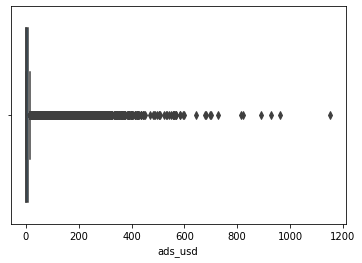

In [49]:
sns.boxplot(data=df_ads,x=df_ads['ads_usd'])

In [50]:
df_ads['client_id'].value_counts(ascending=False)

94     1222
121    1161
174    1137
71     1107
189    1083
104     836
97      833
256     788
95      684
73      617
154     491
184     335
302     248
122     212
380     195
219     166
275     166
374     165
370     139
390     126
110     100
325      43
98       38
321      37
402      21
152       8
183       5
Name: client_id, dtype: int64

### We can see that the mean of the ads payed is not reliable as their many outliers in the dataset that make the mean higher than it should be for the ads

In [51]:
df_ads['country_id'].value_counts(ascending=False)

1      6268
109    4963
213     407
17      325
Name: country_id, dtype: int64

<AxesSubplot: xlabel='country_id', ylabel='count'>

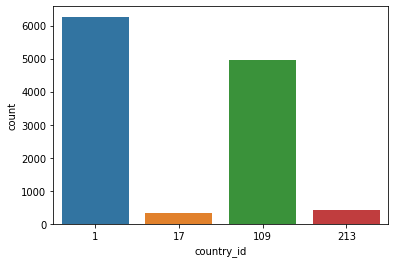

In [52]:
sns.countplot(data=df_ads,x=df_ads['country_id'])



In [53]:
df_ads['network_id'].value_counts(ascending=False)

60    7373
10    4590
Name: network_id, dtype: int64

<AxesSubplot: xlabel='network_id', ylabel='count'>

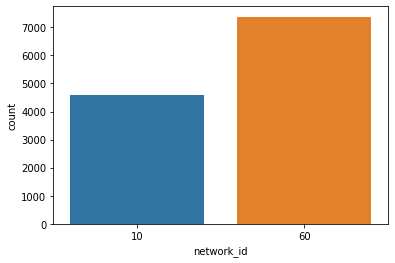

In [54]:
sns.countplot(data=df_ads,x=df_ads['network_id'])


In [55]:
df_ads['day'].value_counts(ascending=False)

26    414
1     411
18    411
4     410
15    408
6     408
16    406
7     403
2     400
11    399
28    399
8     398
25    398
5     396
13    392
12    391
23    389
27    389
14    386
17    386
22    386
10    385
24    382
21    380
3     379
19    374
9     374
20    366
29    363
30    353
31    227
Name: day, dtype: int64

In [56]:
df_ads['dayofweek'].value_counts(ascending =False)

6    1783
5    1767
0    1704
4    1694
1    1680
3    1669
2    1666
Name: dayofweek, dtype: int64

In [57]:
df_ads['month'].value_counts(ascending =False)

8     1349
1     1084
7     1076
10    1027
9     1008
11     998
2      978
3      935
6      914
5      897
12     881
4      816
Name: month, dtype: int64

In [58]:
df_installs

,install_id,country_id,app_id,network_id,event_date,device_os_version,month,day,dayofweek
0,6b168a9f7a13119b87bfeb834d159f6879ff000205cb27...,1,174,26,2022-12-13,10,12,13,1
1,218ecd973c988fe76dfd247f92e9317485010844163a51...,1,174,60,2022-12-14,10,12,14,2
2,f67c1382fc3af8a24cb6f23bff381279d582eb67d4043e...,17,122,26,2022-12-30,11,12,30,4
3,afe4dc7c1663fba7ba3bc7cf6a308c38c1cb409d253f7f...,1,121,1111,2022-12-30,8.0.0,12,30,4
4,417acac6a6bdb88a83371f8ab482691d16896e8681afcb...,109,325,10,2022-12-05,11,12,5,0
...,...,...,...,...,...,...,...,...,...
216883,19be0a9a4458de0d52547e141df90507cf6432ff8ac512...,213,184,60,2022-01-08,10,1,8,5
216884,a39a5e320f0cad2c67184302a1e5deeea9c12a1fa9a34d...,109,121,60,2022-01-08,11,1,8,5
216885,e6a9b7812608a10ba6a5c654e33ee2482a4e6cd4f9ec2f...,109,121,26,2022-01-08,11,1,8,5
216886,e0fd2cee99c16389dd64ba242471d5709f64033b03fb08...,109,174,60,2022-01-08,10,1,8,5


In [59]:
df_installs['country_id'].value_counts()

1      135241
109     61841
17      10671
213      9134
Name: country_id, dtype: int64

<AxesSubplot: xlabel='country_id', ylabel='count'>

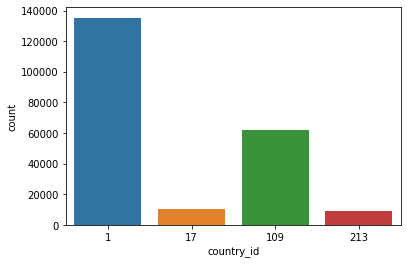

In [60]:
sns.countplot(data=df_installs,x=df_installs['country_id'])


In [61]:
df_installs['app_id'].value_counts().sort_values(ascending=False)



174    47416
121    39868
94     32265
189    10082
71      8299
122     7955
154     7694
97      7370
256     6184
104     5286
95      5214
302     4872
370     4853
275     4625
184     3658
374     3526
380     3417
277     3273
73      2361
219     1841
237     1383
321     1183
390     1075
110      688
148      620
325      597
152      273
98       244
402      192
183      183
408       64
204       56
96        45
404       36
179       32
191       31
405       26
172       22
238       16
407       15
298       11
228       10
235       10
120        8
115        2
294        1
150        1
304        1
180        1
108        1
113        1
Name: app_id, dtype: int64

In [62]:
df_installs['network_id'].value_counts().sort_values(ascending=False)


60      110462
26       73979
10       26345
1111      6101
Name: network_id, dtype: int64

<AxesSubplot: xlabel='network_id', ylabel='count'>

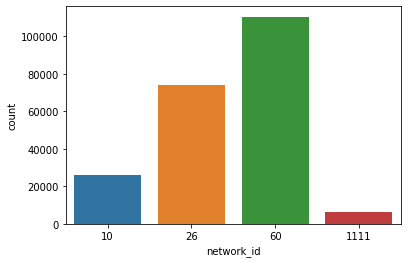

In [63]:
sns.countplot(data=df_installs,x=df_installs['network_id'])


In [64]:
df_installs['device_os_version'].value_counts().sort_values(ascending=False).head(20)


11        79355
12        56678
10        45660
9         16285
8.0.0      5736
8.1.0      3894
13         2634
7.0         898
7.1.2       775
7.1.1       748
15.6.1      716
16.0        531
16.1.1      447
6.0.1       319
16.1        284
16.0.2      231
6.0         213
5.1.1       207
16.0.3      173
15.5        137
Name: device_os_version, dtype: int64

In [65]:
df_installs['day'].value_counts(ascending=False)

26    8207
27    7770
6     7519
23    7390
4     7384
20    7346
25    7345
28    7269
22    7267
5     7244
8     7231
21    7205
2     7191
11    7058
12    7058
24    7042
13    7024
3     7019
1     6945
18    6938
7     6913
19    6882
16    6831
17    6827
10    6771
15    6765
30    6653
29    6619
9     6590
14    6321
31    4263
Name: day, dtype: int64

In [66]:
df_installs['dayofweek'].value_counts(ascending=False)

6    36253
5    33213
4    29845
2    29801
0    29634
1    29405
3    28736
Name: dayofweek, dtype: int64

In [67]:
df_installs['month'].value_counts(ascending=False)

8     30427
11    22732
1     21224
9     19945
12    19322
7     17844
10    17387
6     14906
2     14816
3     13518
5     13424
4     11342
Name: month, dtype: int64

In [68]:
df_revenue

,install_id,event_date,revenue_usd,month,day,dayofweek
0,213197bd66cd889d103ab9059709458e49808214837508...,2022-12-16,1.5800,12,16,4
1,251442e25a39fb706e242445db49498ba1d6762c1ff46e...,2022-12-21,6.7500,12,21,2
2,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,2022-12-21,1.6200,12,21,2
3,9505bab0515c96b7d8c9a5aeb1fb28ae397b23badb2f03...,2022-12-20,0.0015,12,20,1
4,fa69bdded229f9ebb18290559d77cefbd8e5ad83d74b86...,2022-12-16,0.5400,12,16,4
...,...,...,...,...,...,...
2629298,80d166614729e4de20bcc0202b0d8194f7de7d3e14bf56...,2022-01-09,1.1900,1,9,6
2629305,0fea0558453a875ca360fa0c9e7cdeec181c5e2474e2e6...,2022-01-09,0.2800,1,9,6
2629308,0fea0558453a875ca360fa0c9e7cdeec181c5e2474e2e6...,2022-01-09,0.5600,1,9,6
2629312,ac1da1cd8464aa8206b4372578ef15a273e06db5227182...,2022-01-09,1.0500,1,9,6


In [69]:
df_revenue['revenue_usd'].mean()

0.5334221182817491

<AxesSubplot: xlabel='revenue_usd'>

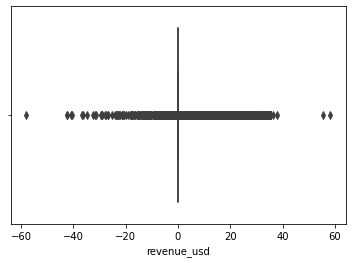

In [70]:
sns.boxplot(data=df_revenue,x=df_revenue['revenue_usd'])

In [71]:
df_revenue['revenue_usd'].mean()

0.5334221182817491

<AxesSubplot: xlabel='revenue_usd'>

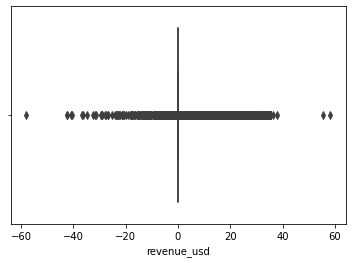

In [72]:
sns.boxplot(data=df_revenue,x=df_revenue['revenue_usd'])

In [73]:
df_revenue['dayofweek'].value_counts(ascending=False)

6    126717
5    119553
1    107096
0    105789
4    105487
2    104887
3    101579
Name: dayofweek, dtype: int64

In [74]:
df_revenue['day'].value_counts(ascending=False)

8     27538
6     26854
27    26677
13    26649
28    26593
7     26228
26    26196
3     26192
5     26042
9     25875
23    25764
11    25577
20    25337
10    25203
12    25153
21    24917
19    24870
2     24830
30    24817
29    24750
25    24654
15    24322
24    24318
16    24274
4     24086
18    23933
1     23915
14    23882
22    23832
17    23312
31    14518
Name: day, dtype: int64

In [75]:
df_revenue['month'].value_counts(ascending=False)

11    102173
12     83472
1      82098
2      77221
8      66896
10     62902
9      56542
3      55142
4      53942
7      52705
6      39193
5      38822
Name: month, dtype: int64

In [76]:
df_payouts

,install_id,event_date,payout_usd,month,day,dayofweek
0,8912076a49c7b17960f8d262dc37599f86cbb3da8912b6...,2022-12-21,0.254376,12,21,2
1,7488c7b0f3d25cea61e435ea2aa346d3bbf1b946b94b1f...,2022-12-28,0.361216,12,28,2
2,66ee0cd1d490d9d352b46b443c9d5b5aa5bdabfbdb303b...,2022-12-10,0.359006,12,10,5
3,66ee0cd1d490d9d352b46b443c9d5b5aa5bdabfbdb303b...,2022-12-10,0.253416,12,10,5
10,b471322de9a2f2f164f0d5a8016cb6d4be41e9bde7e2d2...,2022-12-10,3.558383,12,10,5
...,...,...,...,...,...,...
51998,f280f52a3e6e7e105204ae6e5533bdcf149371807f1b5e...,2022-01-26,1.910376,1,26,2
51999,5416f5bd483d76e684e0d3ed090fd10342c3168f0fa492...,2022-01-27,0.383418,1,27,3
52000,4fb5afa7d5dfd772e84bae4979a64fdf9cea75420294f1...,2022-01-26,0.757368,1,26,2
52001,4fb5afa7d5dfd772e84bae4979a64fdf9cea75420294f1...,2022-01-26,0.384336,1,26,2


In [77]:
df_payouts['payout_usd'].mean()

1.4074323369543797

<AxesSubplot: xlabel='payout_usd'>

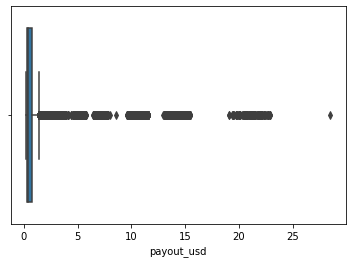

In [78]:
sns.boxplot(data=df_revenue,x=df_payouts['payout_usd'])

In [79]:
df_payouts['day'].value_counts(ascending=False)

23    1652
26    1641
20    1563
24    1531
19    1526
22    1523
21    1505
27    1493
25    1466
18    1462
17    1435
16    1387
15    1367
12    1343
28    1338
13    1329
11    1257
10    1243
6     1230
8     1213
4     1207
14    1202
9     1199
29    1199
2     1189
30    1174
7     1155
1     1145
3     1079
5     1041
31     778
Name: day, dtype: int64

In [80]:
df_payouts['dayofweek'].value_counts(ascending=False)

6    6180
2    5949
4    5855
0    5825
1    5717
5    5705
3    5641
Name: dayofweek, dtype: int64

In [81]:
df_payouts['month'].value_counts(ascending=False)

8     7471
9     4198
11    4045
12    3428
1     3149
7     3008
10    2954
6     2856
5     2788
2     2474
3     2472
4     2029
Name: month, dtype: int64

## Bi/multivariant data analysis

#### Creating one dataframe for better relations

In [82]:
merged_df = pd.merge(df_revenue, df_payouts, on='install_id')
merged_df = pd.merge(merged_df, df_installs, on='install_id')

In [83]:
merged_df

,install_id,event_date_x,revenue_usd,month_x,day_x,dayofweek_x,event_date_y,payout_usd,month_y,day_y,dayofweek_y,country_id,app_id,network_id,event_date,device_os_version,month,day,dayofweek
0,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,2022-12-21,1.62,12,21,2,2022-12-21,0.710133,12,21,2,1,174,60,2022-12-21,10,12,21,2
1,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,2022-12-21,1.62,12,21,2,2022-12-21,3.571863,12,21,2,1,174,60,2022-12-21,10,12,21,2
2,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,2022-12-21,1.62,12,21,2,2022-12-23,3.583321,12,23,4,1,174,60,2022-12-21,10,12,21,2
3,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,2022-12-21,1.62,12,21,2,2022-12-23,0.361522,12,23,4,1,174,60,2022-12-21,10,12,21,2
4,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,2022-12-21,21.60,12,21,2,2022-12-21,0.710133,12,21,2,1,174,60,2022-12-21,10,12,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344790,1d42d3d752004b6060eb32ade6aec7be5fcc4292013d5a...,2022-07-24,14.40,7,24,6,2022-07-25,4.626260,7,25,0,1,302,26,2022-07-24,10,7,24,6
344791,afb7b014fdc1a8946abb7f444a03542bd4cb1457dfa4bf...,2022-07-24,14.40,7,24,6,2022-07-25,4.626260,7,25,0,1,302,26,2022-07-24,10,7,24,6
344792,fec371dd56a5784283a85bab5a30fe859a36a3a1d6c4e7...,2022-02-17,0.23,2,17,3,2022-02-18,0.284250,2,18,4,109,154,26,2022-02-17,11,2,17,3
344793,4423449a9b41bbc60c13ebf3a8f63491b1b9ec2c87f752...,2022-01-09,15.40,1,9,6,2022-08-15,0.689095,8,15,0,1,94,26,2022-01-09,11,1,9,6


In [84]:
merged_df.drop(columns=['event_date_x','month_x', 'day_x',
       'event_date_y','month_y', 'day_y','dayofweek_x','dayofweek_y'],axis=1,inplace=True)

In [85]:
merged_df.drop_duplicates(inplace=True)

In [86]:
merged_df.columns

Index(['install_id', 'revenue_usd', 'payout_usd', 'country_id', 'app_id',
       'network_id', 'event_date', 'device_os_version', 'month', 'day',
       'dayofweek'],
      dtype='object')

In [87]:
merged_df

,install_id,revenue_usd,payout_usd,country_id,app_id,network_id,event_date,device_os_version,month,day,dayofweek
0,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1.62,0.710133,1,174,60,2022-12-21,10,12,21,2
1,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1.62,3.571863,1,174,60,2022-12-21,10,12,21,2
2,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1.62,3.583321,1,174,60,2022-12-21,10,12,21,2
3,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1.62,0.361522,1,174,60,2022-12-21,10,12,21,2
4,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,21.60,0.710133,1,174,60,2022-12-21,10,12,21,2
...,...,...,...,...,...,...,...,...,...,...,...
344790,1d42d3d752004b6060eb32ade6aec7be5fcc4292013d5a...,14.40,4.626260,1,302,26,2022-07-24,10,7,24,6
344791,afb7b014fdc1a8946abb7f444a03542bd4cb1457dfa4bf...,14.40,4.626260,1,302,26,2022-07-24,10,7,24,6
344792,fec371dd56a5784283a85bab5a30fe859a36a3a1d6c4e7...,0.23,0.284250,109,154,26,2022-02-17,11,2,17,3
344793,4423449a9b41bbc60c13ebf3a8f63491b1b9ec2c87f752...,15.40,0.689095,1,94,26,2022-01-09,11,1,9,6


In [88]:
merged_df[['payout_usd','app_id']].corr()

,payout_usd,app_id
payout_usd,1.000000,-0.153447
app_id,-0.153447,1.000000


<AxesSubplot: xlabel='app_id', ylabel='payout_usd'>

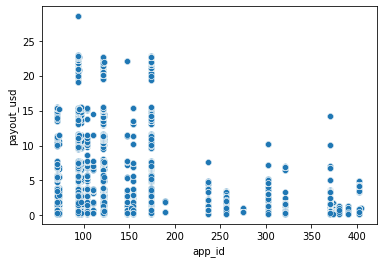

In [89]:
sns.scatterplot(data=merged_df,x=merged_df['app_id'],y=merged_df['payout_usd'])

In [90]:
merged_df[['country_id','app_id']].corr()

,country_id,app_id
country_id,1.000000,0.026792
app_id,0.026792,1.000000


<AxesSubplot: xlabel='country_id', ylabel='app_id'>

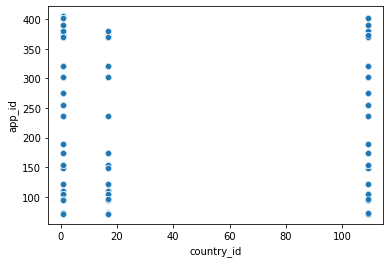

In [91]:
sns.scatterplot(data=merged_df,x=merged_df['country_id'],y=merged_df['app_id'])

In [92]:
merged_df[['device_os_version','app_id']].corr()

,app_id
app_id,1.0


<AxesSubplot: xlabel='device_os_version', ylabel='app_id'>

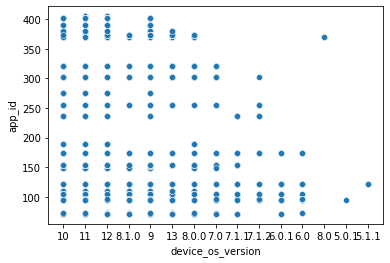

In [93]:
sns.scatterplot(data=merged_df,x=merged_df['device_os_version'],y=merged_df['app_id'])

In [94]:
merged_df[['network_id','app_id']].corr()

,network_id,app_id
network_id,1.000000,0.104631
app_id,0.104631,1.000000


<AxesSubplot: xlabel='network_id', ylabel='app_id'>

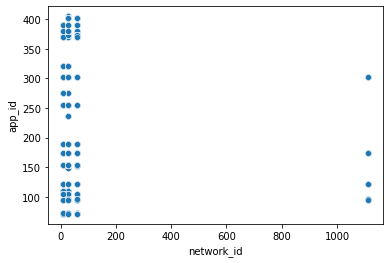

In [95]:
sns.scatterplot(data=merged_df,x=merged_df['network_id'],y=merged_df['app_id'])

In [96]:
merged_df[['revenue_usd','payout_usd']].corr()

,revenue_usd,payout_usd
revenue_usd,1.000000,0.128731
payout_usd,0.128731,1.000000


<AxesSubplot: xlabel='revenue_usd', ylabel='payout_usd'>

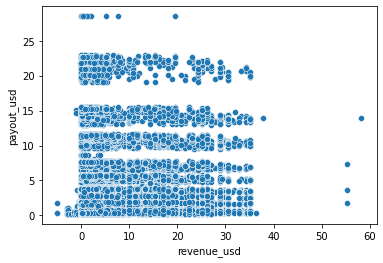

In [97]:
sns.scatterplot(data=merged_df,x=merged_df['revenue_usd'],y=merged_df['payout_usd'])

In [98]:
merged_df[['revenue_usd','country_id']].corr()

,revenue_usd,country_id
revenue_usd,1.000000,-0.220008
country_id,-0.220008,1.000000


<AxesSubplot: xlabel='revenue_usd', ylabel='country_id'>

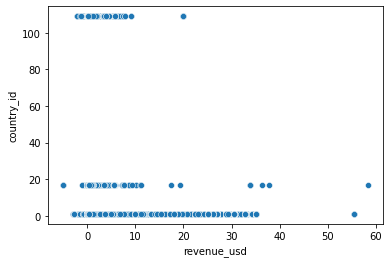

In [99]:
sns.scatterplot(data=merged_df,x=merged_df['revenue_usd'],y=merged_df['country_id'])

<Figure size 10800x3600 with 0 Axes>

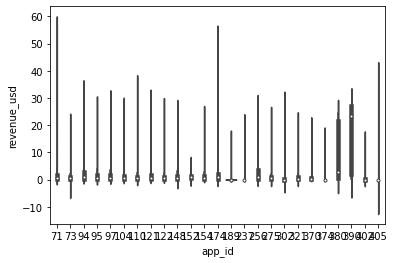

<Figure size 10800x3600 with 0 Axes>

In [100]:
sns.violinplot(data=merged_df,x=merged_df['app_id'],y=merged_df['revenue_usd'])
plt.figure(figsize=(150,50))

In [101]:
merged_df[['revenue_usd','app_id']].corr()

,revenue_usd,app_id
revenue_usd,1.000000,-0.085999
app_id,-0.085999,1.000000


<Figure size 10800x3600 with 0 Axes>

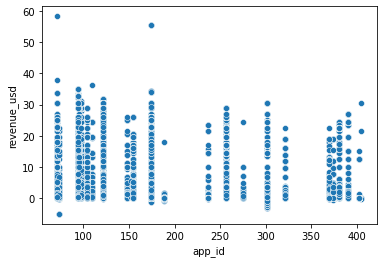

<Figure size 10800x3600 with 0 Axes>

In [102]:
sns.scatterplot(data=merged_df,x=merged_df['app_id'],y=merged_df['revenue_usd'])
plt.figure(figsize=(150,50))

In [103]:
merged_df[['revenue_usd','network_id']].corr()

,revenue_usd,network_id
revenue_usd,1.000000,-0.025117
network_id,-0.025117,1.000000


<AxesSubplot: xlabel='network_id', ylabel='revenue_usd'>

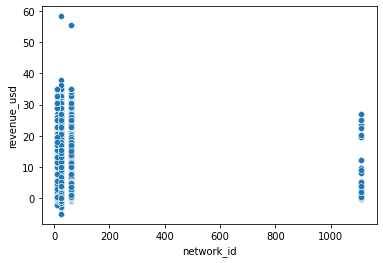

In [104]:
sns.scatterplot(data=merged_df,x=merged_df['network_id'],y=merged_df['revenue_usd'])


<AxesSubplot: xlabel='month', ylabel='revenue_usd'>

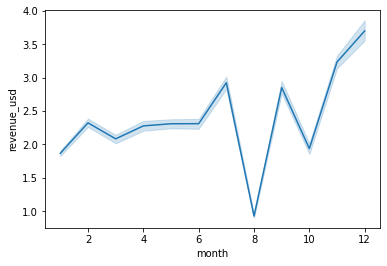

In [105]:
sns.lineplot(data=merged_df,x=merged_df['month'],y=merged_df['revenue_usd'])

<AxesSubplot: xlabel='day', ylabel='revenue_usd'>

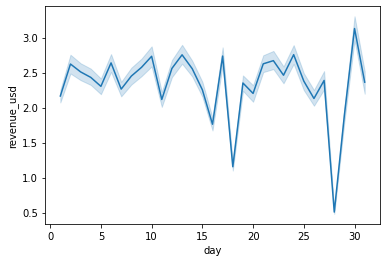

In [106]:
sns.lineplot(data=merged_df,x=merged_df['day'],y=merged_df['revenue_usd'])

<AxesSubplot: xlabel='dayofweek', ylabel='revenue_usd'>

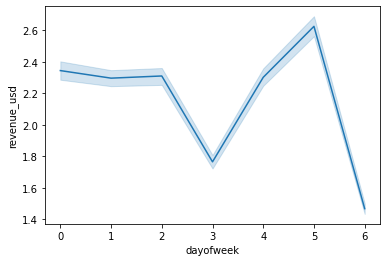

In [107]:
sns.lineplot(data=merged_df,x=merged_df['dayofweek'],y=merged_df['revenue_usd'])

In [108]:
merged_df[['payout_usd','network_id']].corr()

,payout_usd,network_id
payout_usd,1.000000,-0.001774
network_id,-0.001774,1.000000


<AxesSubplot: xlabel='network_id', ylabel='revenue_usd'>

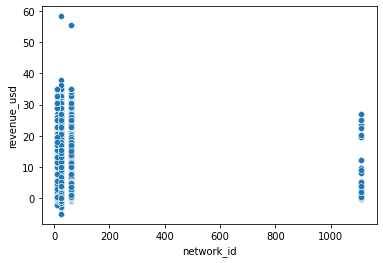

In [109]:
sns.scatterplot(data=merged_df,x=merged_df['network_id'],y=merged_df['revenue_usd'])


In [110]:
merged_df[['payout_usd','country_id']].corr()

,payout_usd,country_id
payout_usd,1.000000,-0.218363
country_id,-0.218363,1.000000


<Figure size 10800x3600 with 0 Axes>

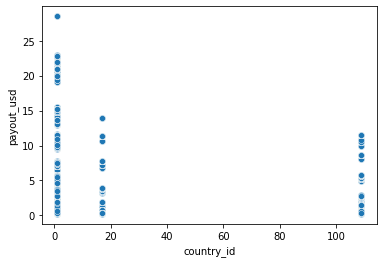

<Figure size 10800x3600 with 0 Axes>

In [111]:
sns.scatterplot(data=merged_df,x=merged_df['country_id'],y=merged_df['payout_usd'])
plt.figure(figsize=(150,50))

In [112]:
merged_df[['payout_usd','app_id']].corr()

,payout_usd,app_id
payout_usd,1.000000,-0.153447
app_id,-0.153447,1.000000


<Figure size 10800x3600 with 0 Axes>

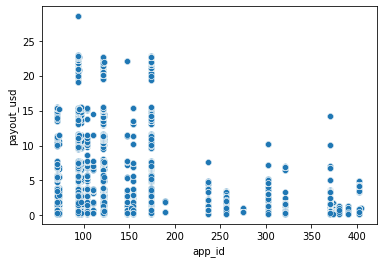

<Figure size 10800x3600 with 0 Axes>

In [113]:
sns.scatterplot(data=merged_df,x=merged_df['app_id'],y=merged_df['payout_usd'])
plt.figure(figsize=(150,50))

In [114]:
merged_df[['payout_usd','device_os_version']].corr()

,payout_usd
payout_usd,1.0


<Figure size 10800x3600 with 0 Axes>

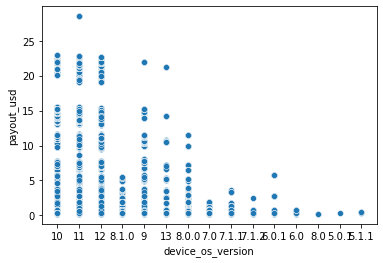

<Figure size 10800x3600 with 0 Axes>

In [115]:
sns.scatterplot(data=merged_df,x=merged_df['device_os_version'],y=merged_df['payout_usd'])
plt.figure(figsize=(150,50))

<AxesSubplot: xlabel='day', ylabel='payout_usd'>

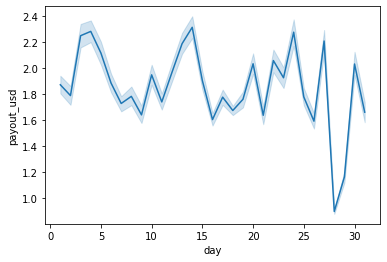

In [116]:
sns.lineplot(data=merged_df,x=merged_df['day'],y=merged_df['payout_usd'])

<AxesSubplot: xlabel='month', ylabel='payout_usd'>

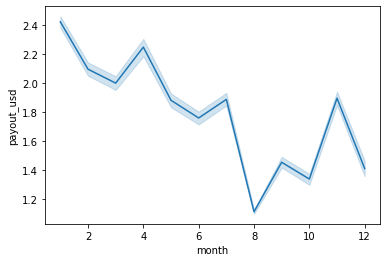

In [117]:
sns.lineplot(data=merged_df,x=merged_df['month'],y=merged_df['payout_usd'])

<AxesSubplot: xlabel='dayofweek', ylabel='payout_usd'>

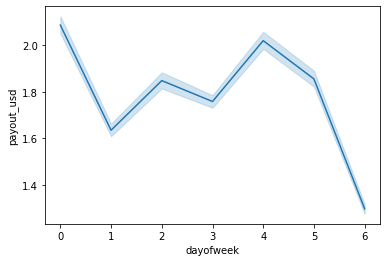

In [118]:
sns.lineplot(data=merged_df,x=merged_df['dayofweek'],y=merged_df['payout_usd'])

<AxesSubplot: xlabel='day', ylabel='ads_usd'>

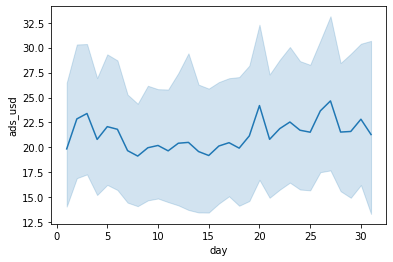

In [119]:
sns.lineplot(data=df_ads,x=df_ads['day'],y=df_ads['ads_usd'])

<AxesSubplot: xlabel='dayofweek', ylabel='ads_usd'>

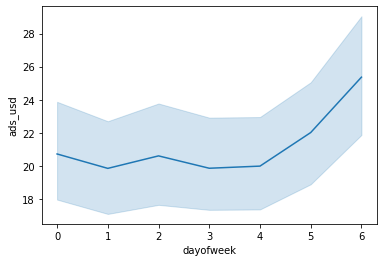

In [120]:
sns.lineplot(data=df_ads,x=df_ads['dayofweek'],y=df_ads['ads_usd'])

<AxesSubplot: xlabel='month', ylabel='ads_usd'>

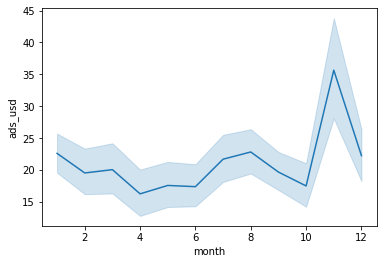

In [121]:
sns.lineplot(data=df_ads,x=df_ads['month'],y=df_ads['ads_usd'])

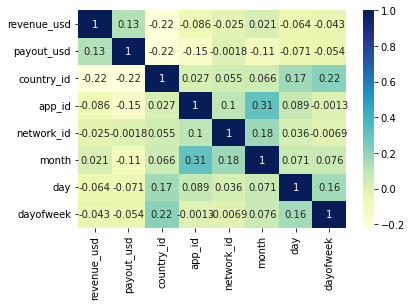

In [122]:
sns.heatmap(merged_df.corr(), annot=True, cmap="YlGnBu")
plt.show()


In [123]:
profile = ProfileReport(merged_df,title='Pandas profiling Report')
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [124]:
# importing sweetviz
import sweetviz as sv
#analyzing the dataset
advert_report = sv.analyze(merged_df)
#display the report
advert_report.show_html('JustDice.html')

                                             |                                             | [  0%]   00:00 ->…

Report JustDice.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Total Revenue of the year 

In [125]:
RevenueOfTheYear=df_revenue['revenue_usd'].sum().round()

In [126]:
RevenueOfTheYear

411326.0

## Total Ads spent

In [127]:
TotalAds=df_ads['ads_usd'].sum().round()

In [128]:
TotalAds

254076.0

## Total Payout

In [129]:
TotalPayout=df_payouts['payout_usd'].sum().round()

In [130]:
TotalPayout

57525.0

## Profit

In [131]:
Profit = (RevenueOfTheYear-(TotalAds+TotalPayout))

In [132]:
Profit

99725.0

### Answers for these questions:

1. What is the distribution of app installations and revenue across different days of the week?
2. Are there any seasonal trends in app installations and revenue?
3. How do different client IDs ads spent?
4. What is the distribution of app installations and revenue across different app IDs?
5. Are there any relationships between the country of installation and the type of device being used?
7. Are there any correlations between revenue, payouts ?
10. What is the distribution of ad spend across different networks and countries?
11. Are there any significant differences in ad performance across different networks and countries?
12. Are there any correlations between payouts, ads, and revenue?
13. Which networks are the most effective at driving app installs and generating revenue?
14. Which countries have the highest number of app installations and revenue?
15. Which countries have the highest revenue and how does this vary over time?
16. What is the overall trend in revenue and how does this vary by app, network, or client?
17. What is the amount of revenue in each country in 2022?
14. What is the top 10 apps with revenue  in 2022 ??

## 1. What is the distribution of app installations and revenue across different days of the week?


In [133]:
grouped_installs1 = df_installs.groupby('dayofweek').agg({'install_id': 'count'})
grouped_revenue1 = df_revenue.groupby('dayofweek').agg({'revenue_usd': 'sum'})
grouped_payouts1 = df_payouts.groupby('dayofweek').agg({'payout_usd': 'sum'})



In [134]:
merged = grouped_installs1.merge(grouped_revenue1, on='dayofweek').merge(grouped_payouts1, on='dayofweek')


<AxesSubplot: xlabel='dayofweek'>

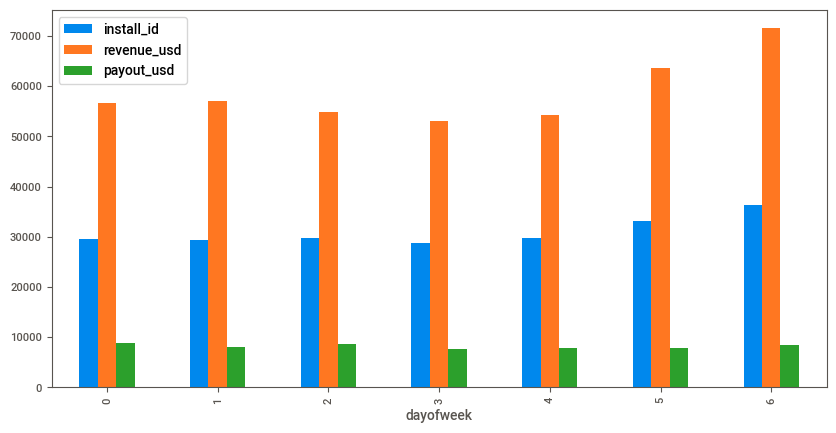

In [135]:
merged.plot(kind='bar', figsize=(10, 5))

### Saturday and Sunday have the highest amount of number of installs , revenue , payout while thursday have the lowest amount of installs , revenue and payout

## 2. Are there any seasonal trends in app installations and revenue?

In [137]:
grouped_installs2 = df_installs.groupby('month').agg({'install_id': 'count'})
grouped_revenue2 = df_revenue.groupby('month').agg({'revenue_usd': 'sum'})
grouped_payouts2 = df_payouts.groupby('month').agg({'payout_usd': 'sum'})


In [138]:
merged = grouped_installs2.merge(grouped_revenue2, on='month').merge(grouped_payouts2, on='month')


<AxesSubplot: xlabel='month'>

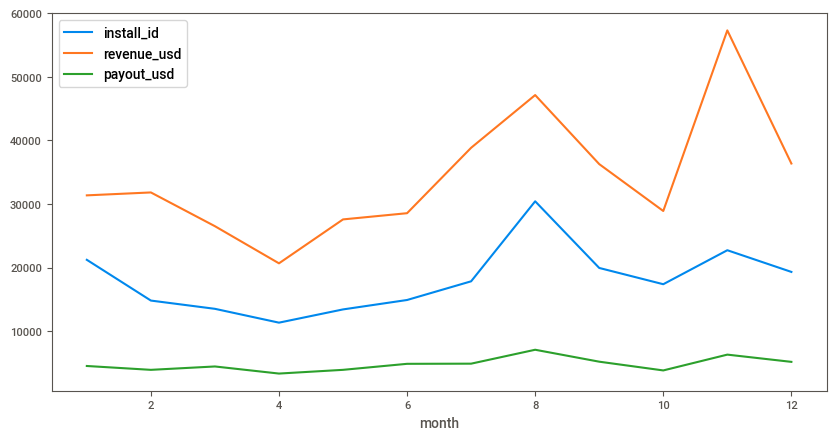

In [139]:
merged.plot(kind='line', figsize=(10, 5))


### There are seasonal positive trend in November then a season negative trend in April ,November and December for revenue  

### There are a seasonal positive trend in August for number of installs

### Things in payout are steady without any unusual trends

## 3. How do different client IDs ads spent?

In [140]:
client_ads_spent = df_ads.groupby('client_id').agg({'ads_usd': 'sum'})


In [141]:
client_ads_spent = client_ads_spent.sort_values('ads_usd', ascending=False)


<AxesSubplot: xlabel='client_id'>

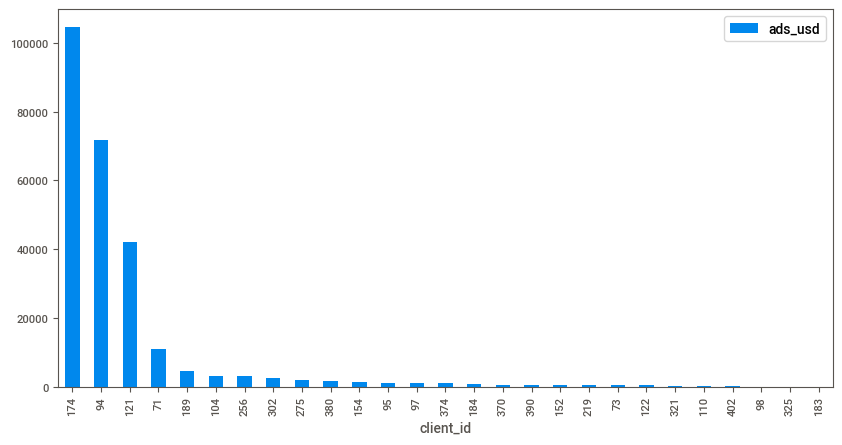

In [142]:
client_ads_spent.plot(kind='bar', figsize=(10, 5))


### It seems that clients who have ID number (174,94,121) has the highest number of ad spending

## 4. What is the distribution of app installations and revenue across different app IDs?

In [143]:
app_data = merged_df.groupby('app_id').agg({'install_id': 'count'})
revenue_data3 = merged_df.groupby('app_id').agg({'revenue_usd': 'sum'})


In [144]:
app_revenue_data = app_data.merge(revenue_data3, on='app_id')


In [145]:
app_revenue_data = app_revenue_data.sort_values('revenue_usd', ascending=False)


<AxesSubplot: xlabel='install_id', ylabel='revenue_usd'>

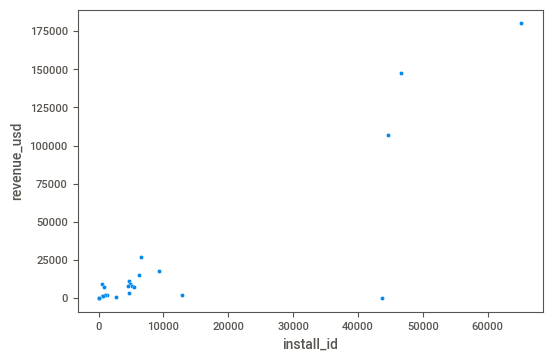

In [146]:

sns.scatterplot(x='install_id', y='revenue_usd', data=app_revenue_data)


### Most of the apps with low count of installations have revenue under 10000 usd but the three apps with high number of installations have over 40000 usd revenue for each one

## 5. Are there any relationships between the country of installation and the type of device being used?

Text(37.24594328703704, 0.5, 'Proportion of Installs')

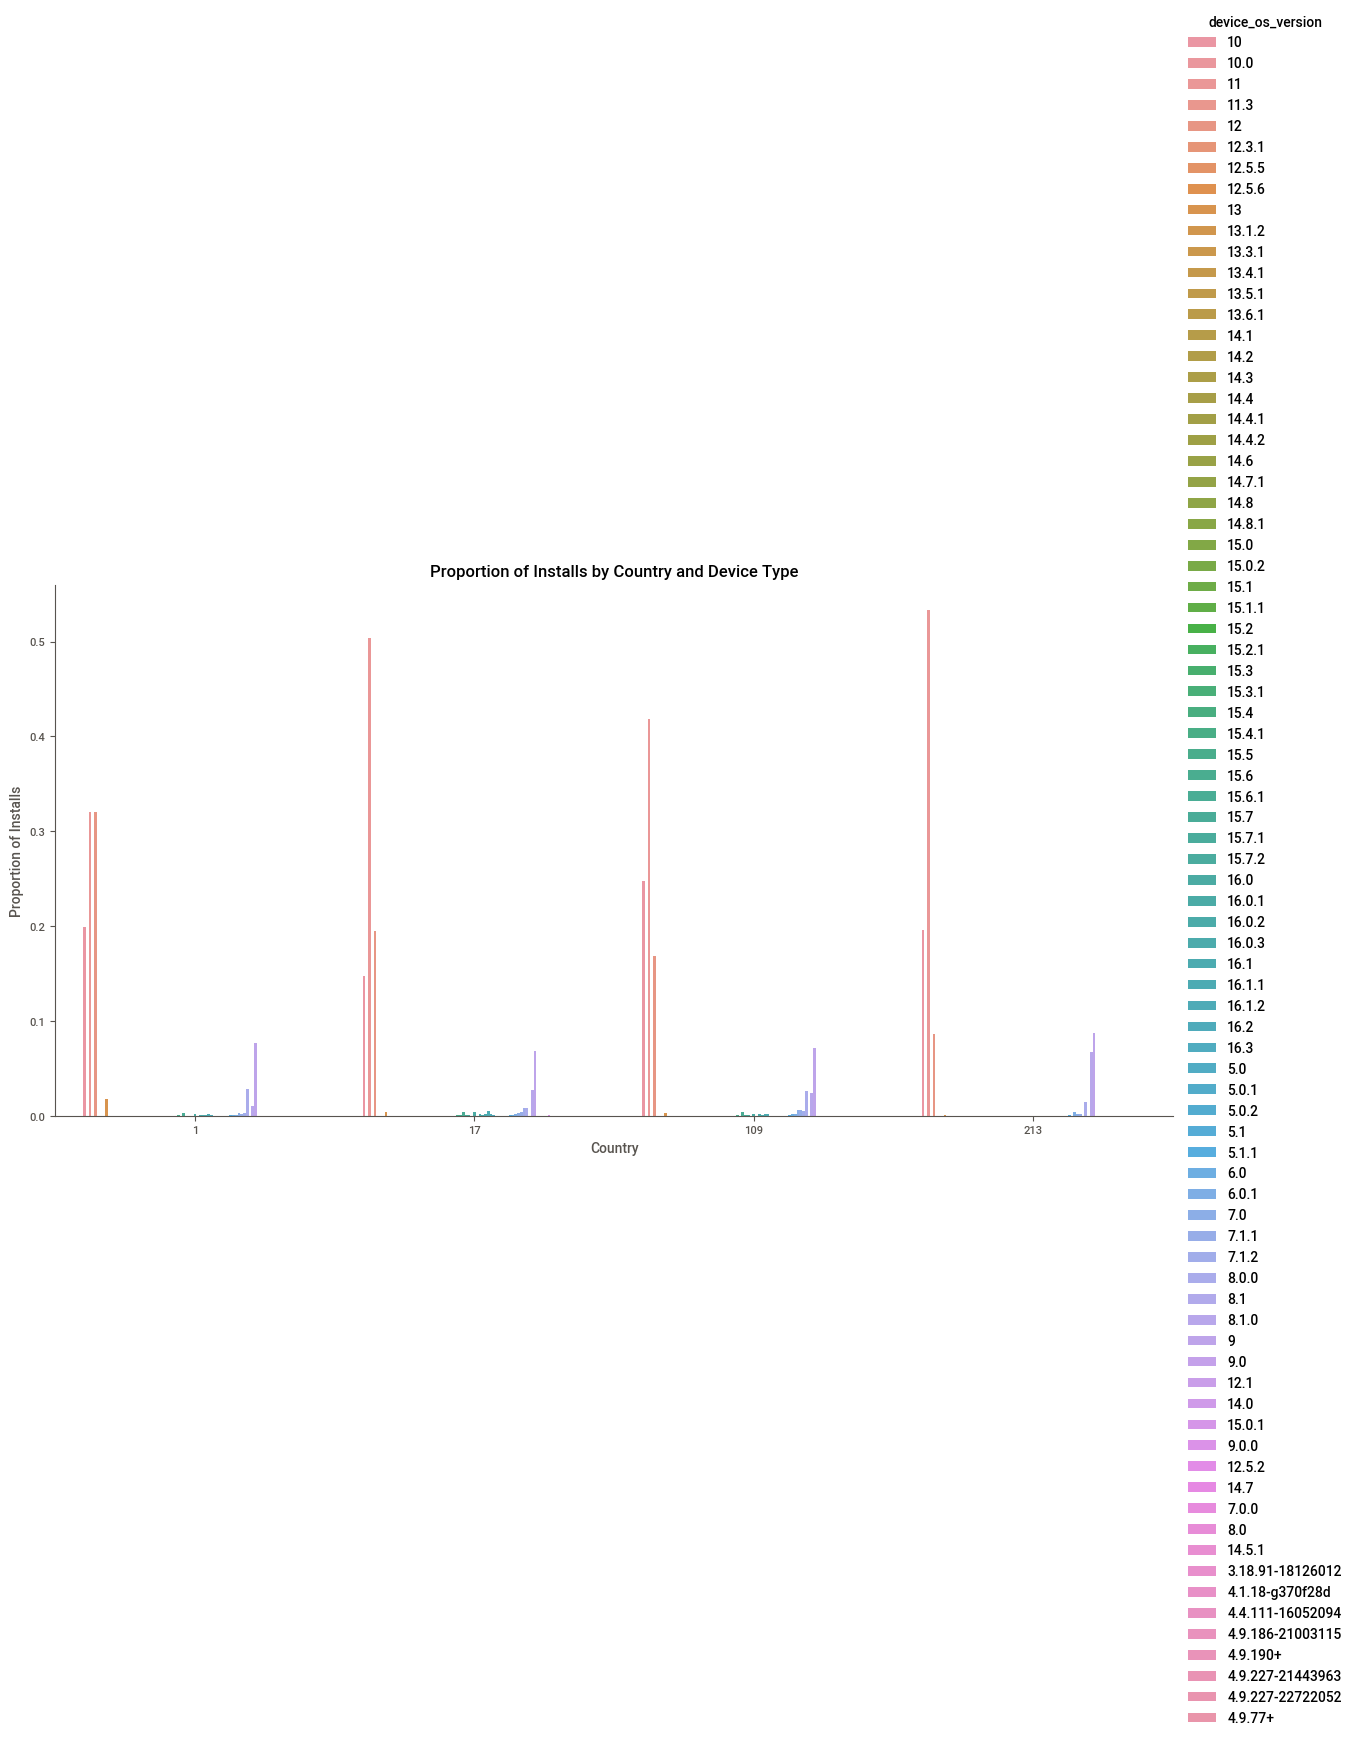

In [147]:


# Group the data by country_id and device_os_version
grouped = df_installs.groupby(['country_id', 'device_os_version']).size().reset_index(name='count')

# Calculate the total number of installs for each country
totals = grouped.groupby('country_id')['count'].transform('sum')

# Calculate the proportion of installs for each device type within each country
grouped['proportion'] = grouped['count'] / totals

# Visualize the data using a grouped bar chart
sns.catplot(x='country_id', y='proportion', hue='device_os_version', data=grouped, kind='bar', height=6, aspect=2)

# Set the plot title and axis labels
plt.title('Proportion of Installs by Country and Device Type')
plt.xlabel('Country')
plt.ylabel('Proportion of Installs')


### Most of our users in different 4 countries use os_version between 10 to 13

## 6. Are there any correlations between revenue, payouts

In [148]:
merged_df[['revenue_usd','payout_usd']].corr()

,revenue_usd,payout_usd
revenue_usd,1.000000,0.128731
payout_usd,0.128731,1.000000


<AxesSubplot: xlabel='revenue_usd', ylabel='payout_usd'>

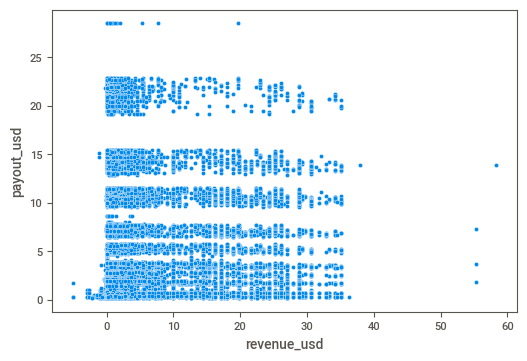

In [149]:
sns.scatterplot(data=merged_df,x='revenue_usd',y='payout_usd')

### There is no correlation between revenue and payout

## 7. What is the distribution of ad spend across different networks and countries?

Text(33.40391460905349, 0.5, 'Ad Spend (USD)')

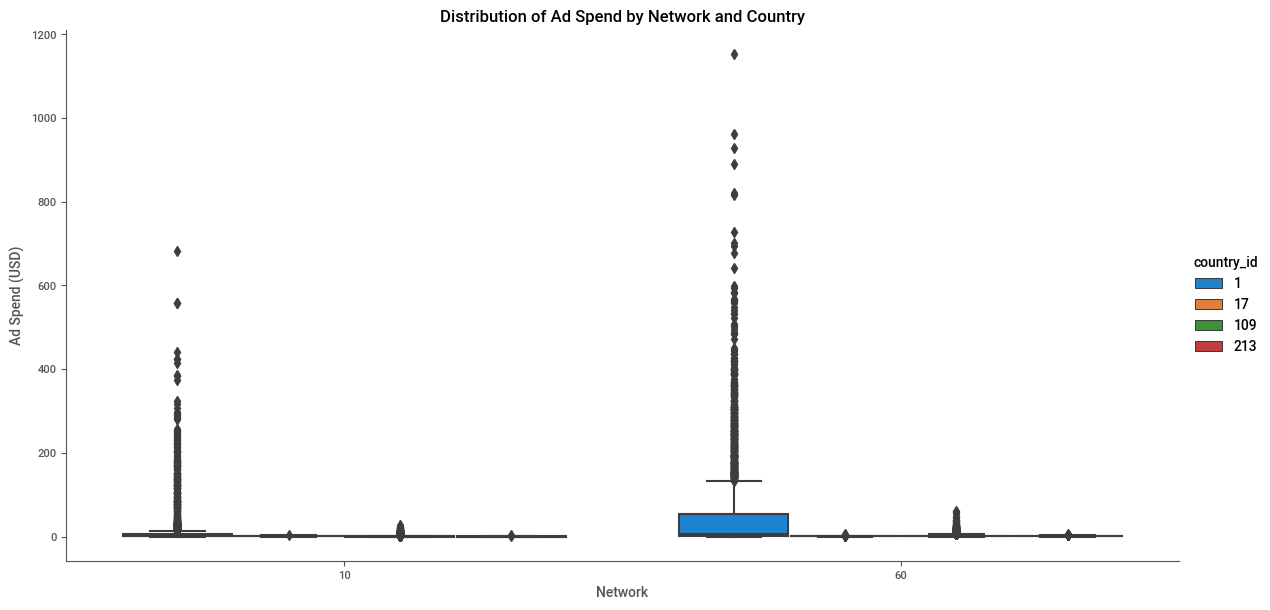

In [150]:

sns.catplot(x='network_id', y='ads_usd', hue='country_id', data=df_ads, kind='box', height=6, aspect=2)

plt.title('Distribution of Ad Spend by Network and Country')
plt.xlabel('Network')
plt.ylabel('Ad Spend (USD)')


### On Network 10 and 60 , Country 1 and 109 have the most ad spent

## 8. Which networks are the most effective at driving app installs and generating revenue?

In [151]:

grouped = merged_df.groupby('network_id').agg({'install_id': 'nunique', 'revenue_usd': 'sum'})
grouped['revenue_per_install'] = grouped['revenue_usd'] / grouped['install_id']
grouped = grouped.sort_values('revenue_per_install', ascending=False)


print(grouped.head())

            install_id    revenue_usd  revenue_per_install
network_id                                                
60                6477  288247.767453            44.503284
10                1745   59369.419793            34.022590
1111                61    1567.567036            25.697820
26               10518  215724.942677            20.510073


###  Network 60 has 6477 install with revenue 288247 with revenue per install equals 44.50 which is the highest number of revenue per install . Network 26 has the highest number of installs with 10518 with total revenue 215724 and revenue per install 20.51

## 9. Which countries have the highest number of app installations and revenue?

In [152]:
installs_by_country = merged_df.groupby('country_id')['install_id'].count().reset_index(name='num_installs')
revenue_by_country = merged_df.groupby('country_id')['revenue_usd'].sum().reset_index(name='total_revenue')
merged_df1 = pd.merge(installs_by_country, revenue_by_country, on='country_id')
top_10_countries = merged_df1.sort_values('total_revenue', ascending=False).head(10)
print(top_10_countries)








   country_id  num_installs  total_revenue
0           1        190407  538559.792320
2         109         73143   21283.178803
1          17          8613    5066.725837


### Country with id 1 have the highest number of installations and total revenue

## 10. Which countries have the highest revenue and how does this vary over time?

Text(0, 0.5, 'Revenue (USD)')

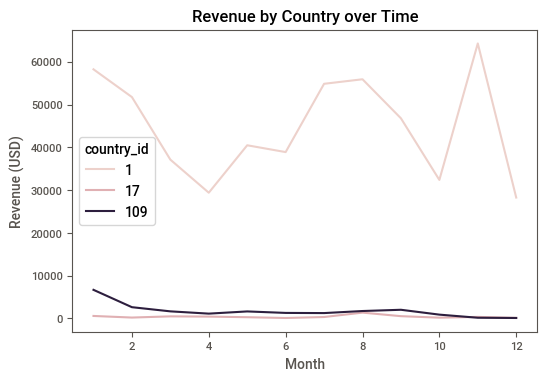

In [153]:
grouped = merged_df.groupby(['country_id', 'month'])['revenue_usd'].sum().reset_index()
grouped = grouped.sort_values(by='revenue_usd', ascending=False)
sns.lineplot(x='month', y='revenue_usd', hue='country_id', data=grouped)
plt.title('Revenue by Country over Time')
plt.xlabel('Month')
plt.ylabel('Revenue (USD)')


### Country with id 1 have the highest number of revenue all over the year and it has unusual negative trend in December

## 11.What is the overall trend in revenue and how does this vary by app, network, or client?

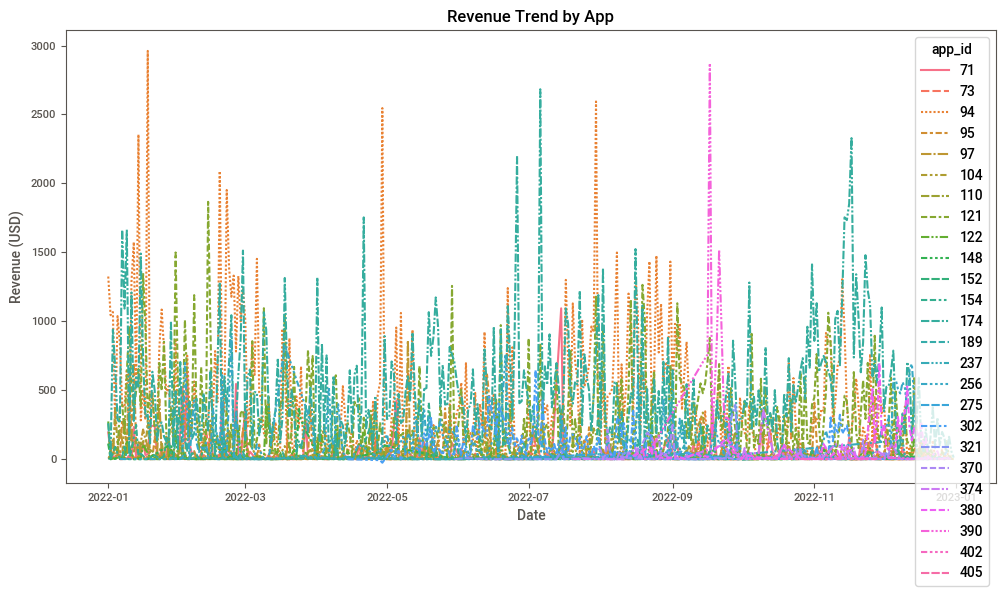

In [154]:
revenue_by_app = merged_df.groupby(['app_id', 'event_date'])['revenue_usd'].sum().reset_index()
revenue_by_app = revenue_by_app.pivot(index='event_date', columns='app_id', values='revenue_usd')
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=revenue_by_app)
plt.title('Revenue Trend by App')
plt.xlabel('Date')
plt.ylabel('Revenue (USD)')
plt.show()


##  12. What is the amount of revenue in each country in 2022 ??

In [155]:
merged_df.groupby('country_id').sum()['revenue_usd'].sort_values(ascending=False)

country_id
1      538559.792320
109     21283.178803
17       5066.725837
Name: revenue_usd, dtype: float64

### Country with id 1 is the country with the most revenue

## 13. What is the amount of payout in each country ?

In [156]:
merged_df.groupby('country_id').sum()['payout_usd'].sort_values(ascending=False)

country_id
1      417885.695869
109     48196.019127
17       6114.465194
Name: payout_usd, dtype: float64

### Country with id 1 is the country with the most payout

## 14. What is the top 10 apps with revenue  in 2022 ??

In [157]:
merged_df.groupby('app_id').sum()['revenue_usd'].sort_values(ascending=False).head(10)

app_id
174    180033.963883
94     147501.885734
121    106746.955863
256     27014.490789
302     17558.733872
71      14888.478082
95      11409.659087
97       9203.485607
390      8934.530000
104      8053.937705
Name: revenue_usd, dtype: float64

### Apps with id number 174 , 94 , 121 are the most apps with revenue with big difference than other apps

## 15. What is the most operating system with installs ?

In [158]:
merged_df['device_os_version'].value_counts().sort_values(ascending=False)

11       116265
12        92354
10        44372
9          9880
8.0.0      4977
13         2589
8.1.0       953
7.0         331
7.1.1       218
6.0.1       115
6.0          59
7.1.2        44
5.1.1         3
8.0           2
5.0.1         1
Name: device_os_version, dtype: int64

### Operating systems 11 , 12 are the most operating systems with installs

## 16. what is the most operating system with revenue ?

In [159]:
merged_df.groupby('device_os_version').sum()['revenue_usd'].sort_values(ascending=False).head(10)

device_os_version
12       234127.103554
11       210466.143705
10        94342.991963
9         12862.250892
13         8884.544966
8.0.0      2927.238211
8.1.0       819.701339
7.0         260.912149
7.1.1       111.296732
7.1.2        43.370452
Name: revenue_usd, dtype: float64

### Operating systems 11 , 12 are the most operating systems with revenue

## 17. what is the most operating system with payout ?

In [160]:
merged_df.groupby('device_os_version').sum()['payout_usd'].sort_values(ascending=False).head(10)

device_os_version
12       185506.858003
11       175964.388634
10        88945.701738
9         13384.695854
13         3749.344202
8.0.0      3485.879769
8.1.0       632.096520
7.0         171.034282
6.0.1       160.881776
7.1.1       151.554697
Name: payout_usd, dtype: float64

### Operating systems 11 , 12 are the most operating systems with payout

## 18. Top 10 apps with installs ?

In [161]:
top_10_apps_with_installs=df_installs['app_id'].value_counts().sort_values(ascending=False).head(10).index

top_10_apps = df_installs[df_installs['app_id'].isin(top_10_apps_with_installs)]

In [169]:
df_installs['app_id'].value_counts().sort_values(ascending=False)

174    47416
121    39868
94     32265
189    10082
71      8299
122     7955
154     7694
97      7370
256     6184
104     5286
95      5214
302     4872
370     4853
275     4625
184     3658
374     3526
380     3417
277     3273
73      2361
219     1841
237     1383
321     1183
390     1075
110      688
148      620
325      597
152      273
98       244
402      192
183      183
408       64
204       56
96        45
404       36
179       32
191       31
405       26
172       22
238       16
407       15
298       11
228       10
235       10
120        8
115        2
294        1
150        1
304        1
180        1
108        1
113        1
Name: app_id, dtype: int64

<AxesSubplot: xlabel='app_id', ylabel='count'>

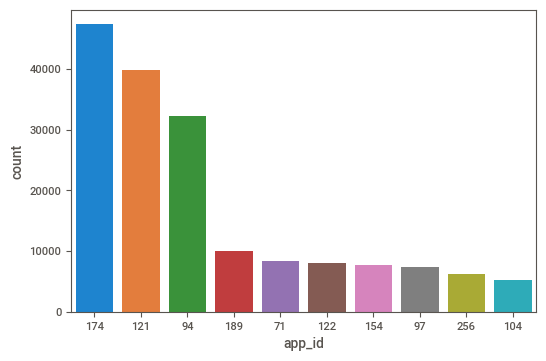

In [162]:
sns.countplot(data = top_10_apps , x = df_installs['app_id'] , order=top_10_apps_with_installs) 

### Apps with id number 174 , 121 , 94 are the most apps with installs 

## 19.Top months with installations

<AxesSubplot: xlabel='month', ylabel='install_count'>

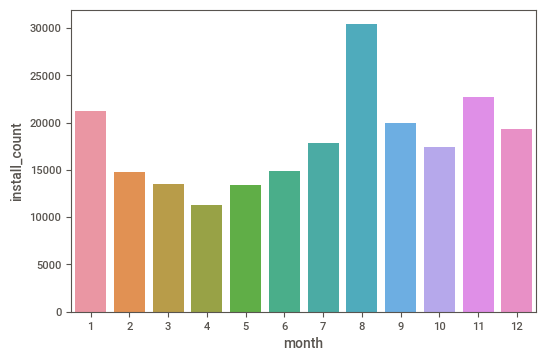

In [164]:
counts = df_installs.groupby("month")["install_id"].count().reset_index(name="install_count")
sns.barplot(x="month", y="install_count", data=counts)


### August has the highest number with install counts and April is the lowest number with install counts

## 20.Top months with revenue

<AxesSubplot: xlabel='month', ylabel='revenue_usd'>

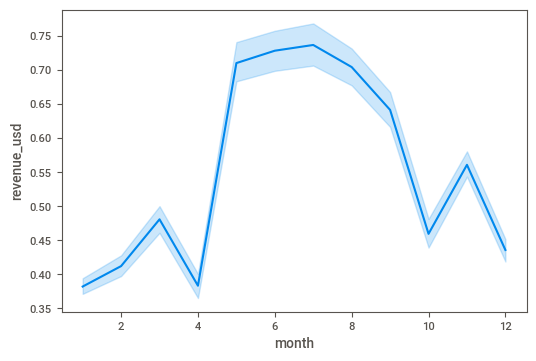

In [165]:
sns.lineplot(data=df_revenue,x=df_revenue['month'],y=df_revenue['revenue_usd'])


## 21.Top months with payout

<AxesSubplot: xlabel='month', ylabel='payout_usd'>

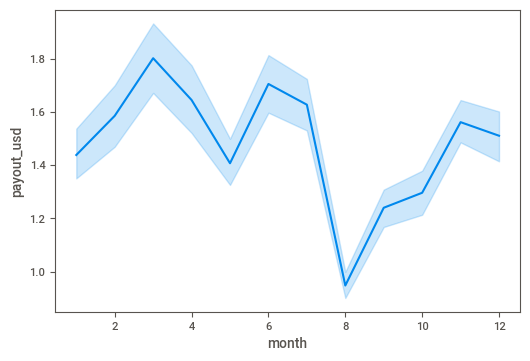

In [166]:
sns.lineplot(data=df_payouts,x=df_payouts['month'],y=df_payouts['payout_usd'])


### Answers collected :-

In [ ]:
### Saturday and Sunday have the highest amount of number of installs , revenue , payout while thursday have the lowest amount of installs , revenue and payout
### There are seasonal positive trend in November then a season negative trend in April ,November and December for revenue 
### There are a seasonal positive trend in August for number of installs
### Things in payout are steady without any unusual trends
### It seems that clients who have ID number (174,94,121) has the highest number of ad spending
### Most of the apps with low count of installations have revenue under 10000 usd but the three apps with high number of installations have over 40000 usd revenue for each one
### Most of our users in different 4 countries use os_version between 10 to 13
### There is no correlation between revenue and payout
### On Network 10 and 60 , Country 1 and 109 have the most ad spent
###  Network 60 has 6477 install with revenue 288247evenue per install equals 44.50 which is the highest number of revenue per install . Network 26 has the highest number of installs with 10518 with total revenue 215724 and revenue per install 20.51
### Country with id 1 have the highest number of installations and total revenue
### Country with id 1 have the highest number of revenue all over the year and it has unusual negative trend in December
### Country with id 1 is the country with the most revenue
### Country with id 1 is the country with the most payout
### Apps with id number 174 , 94 , 121 are the most apps with revenue with big difference than other apps
### Operating systems 11 , 12 are the most operating systems with installs
### Operating systems 11 , 12 are the most operating systems with revenue
### Operating systems 11 , 12 are the most operating systems with payout
### Apps with id number 174 , 121 , 94 are the most apps with installs 

## Machine learning for Customers segmenation 

In [279]:
from scipy.stats.mstats import winsorize
q1 = merged_df['revenue_usd'].quantile(0.25)
q3 = merged_df['revenue_usd'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr
winsorized_revenue = winsorize(merged_df['revenue_usd'], (0.05, 0.05))
merged_df['revenue_usd'] = winsorized_revenue

print(merged_df['revenue_usd'].describe())


count    272163.000000
mean          1.708485
std           3.448799
min           0.000017
25%           0.015140
50%           0.390000
75%           1.310000
max          14.400000
Name: revenue_usd, dtype: float64


## Machine learning model for clustering our users depending on revenue

In [280]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import LabelEncoder

In [281]:
encoder=LabelEncoder()

In [282]:
df_revenue['install_id']=encoder.fit_transform(df_revenue['install_id'])

In [283]:
from scipy.stats.mstats import winsorize
q1 = df_revenue['revenue_usd'].quantile(0.25)
q3 = df_revenue['revenue_usd'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5*iqr
lower_bound = q1 - 1.5*iqr
winsorized_revenue = winsorize(df_revenue['revenue_usd'], (0.05, 0.05))
df_revenue['revenue_usd'] = winsorized_revenue

print(df_revenue['revenue_usd'].describe())

count    771108.000000
mean          0.173148
std           0.467976
min          -0.000120
25%           0.000080
50%           0.001110
75%           0.015000
max           1.890000
Name: revenue_usd, dtype: float64


In [284]:
df_revenue['event_date']=pd.to_datetime(df_revenue['event_date'])

In [285]:
from datetime import datetime
df_revenue['event_date'] = df_revenue['event_date'].apply(datetime.toordinal)

In [287]:
df_revenue.drop(columns=['event_date'],axis=1,inplace=True)

In [288]:
elbowm= KElbowVisualizer(KMeans(),k=12)

<bound method Visualizer.show of KElbowVisualizer(ax=<AxesSubplot: >, estimator=KMeans(n_clusters=12), k=12)>

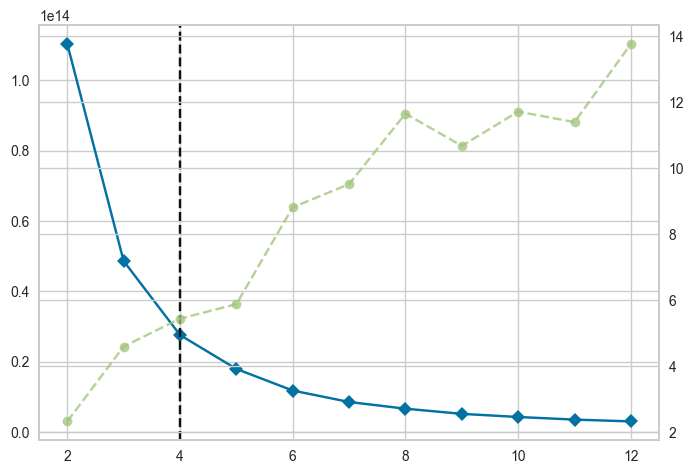

In [289]:
elbowm.fit(df_revenue)
elbowm.show

In [290]:
from sklearn.cluster import KMeans


X = df_revenue['revenue_usd'].values.reshape(-1, 1)
X


array([[1.58],
       [1.89],
       [1.62],
       ...,
       [0.56],
       [1.05],
       [0.22]])

In [291]:

kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)
labels = kmeans.predict(X)
df_revenue['cluster'] = labels
print(df_revenue['cluster'].value_counts())


1    655408
2     45225
3     43936
0     26539
Name: cluster, dtype: int64


In [292]:
df_revenue.shape

(771108, 6)

In [293]:
df_revenue['install_id'] = encoder.inverse_transform(df_revenue['install_id'])
merged_df_clusters = pd.merge(df_revenue, df_payouts, on='install_id')
merged_df_clusters = pd.merge(merged_df_clusters, df_installs, on='install_id')


In [294]:
merged_df_clusters

,install_id,revenue_usd,month_x,day_x,dayofweek_x,cluster,event_date_x,payout_usd,month_y,day_y,dayofweek_y,country_id,app_id,network_id,event_date_y,device_os_version,month,day,dayofweek
0,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1.62,12,21,2,2,2022-12-21,0.710133,12,21,2,1,174,60,2022-12-21,10,12,21,2
1,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1.62,12,21,2,2,2022-12-21,3.571863,12,21,2,1,174,60,2022-12-21,10,12,21,2
2,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1.62,12,21,2,2,2022-12-23,3.583321,12,23,4,1,174,60,2022-12-21,10,12,21,2
3,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1.62,12,21,2,2,2022-12-23,0.361522,12,23,4,1,174,60,2022-12-21,10,12,21,2
4,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1.89,12,21,2,2,2022-12-21,0.710133,12,21,2,1,174,60,2022-12-21,10,12,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344790,1d42d3d752004b6060eb32ade6aec7be5fcc4292013d5a...,1.89,7,24,6,2,2022-07-25,4.626260,7,25,0,1,302,26,2022-07-24,10,7,24,6
344791,afb7b014fdc1a8946abb7f444a03542bd4cb1457dfa4bf...,1.89,7,24,6,2,2022-07-25,4.626260,7,25,0,1,302,26,2022-07-24,10,7,24,6
344792,fec371dd56a5784283a85bab5a30fe859a36a3a1d6c4e7...,0.23,2,17,3,3,2022-02-18,0.284250,2,18,4,109,154,26,2022-02-17,11,2,17,3
344793,4423449a9b41bbc60c13ebf3a8f63491b1b9ec2c87f752...,1.89,1,9,6,2,2022-08-15,0.689095,8,15,0,1,94,26,2022-01-09,11,1,9,6


In [295]:
merged_df_clusters.drop(columns=['event_date_x','month_x', 'day_x',
       'event_date_y','dayofweek_x',],axis=1,inplace=True)

In [296]:
merged_df_clusters

,install_id,revenue_usd,cluster,payout_usd,month_y,day_y,dayofweek_y,country_id,app_id,network_id,device_os_version,month,day,dayofweek
0,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1.62,2,0.710133,12,21,2,1,174,60,10,12,21,2
1,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1.62,2,3.571863,12,21,2,1,174,60,10,12,21,2
2,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1.62,2,3.583321,12,23,4,1,174,60,10,12,21,2
3,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1.62,2,0.361522,12,23,4,1,174,60,10,12,21,2
4,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1.89,2,0.710133,12,21,2,1,174,60,10,12,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344790,1d42d3d752004b6060eb32ade6aec7be5fcc4292013d5a...,1.89,2,4.626260,7,25,0,1,302,26,10,7,24,6
344791,afb7b014fdc1a8946abb7f444a03542bd4cb1457dfa4bf...,1.89,2,4.626260,7,25,0,1,302,26,10,7,24,6
344792,fec371dd56a5784283a85bab5a30fe859a36a3a1d6c4e7...,0.23,3,0.284250,2,18,4,109,154,26,11,2,17,3
344793,4423449a9b41bbc60c13ebf3a8f63491b1b9ec2c87f752...,1.89,2,0.689095,8,15,0,1,94,26,11,1,9,6


In [297]:
merged_df_clusters['cluster'].value_counts(ascending=False)

1    152870
3     79140
2     69287
0     43498
Name: cluster, dtype: int64

<AxesSubplot: xlabel='cluster', ylabel='count'>

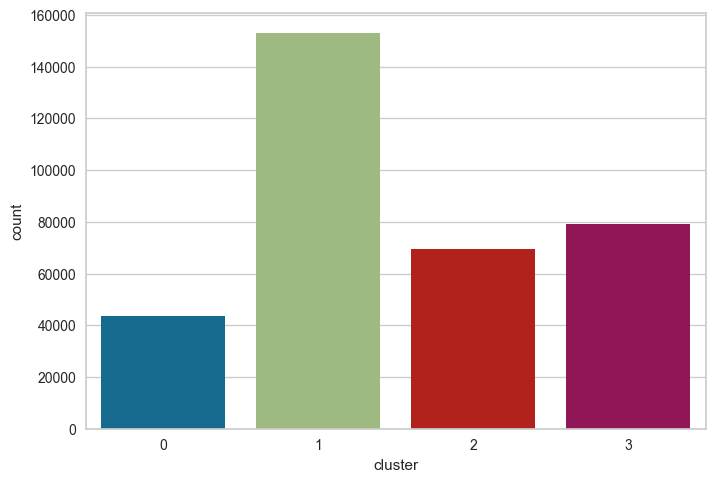

In [315]:
sns.countplot(data=merged_df_clusters,x=merged_df_clusters['cluster'])

## Exploratory data analysis to understand customers segments

1. What are the most common countries in each cluster?
2. Which network_id has the highest number of installs in each cluster?
3. Is there any correlation between the device_os_version and the cluster of the customer?
4. What is the average revenue for each cluster?
5. Are there any particular days of the week that have more revenue generated by each cluster?
6. How does the app_id affect the cluster of the customer?
7. Is there any correlation between the value of the payouts and the cluster of the customer?
9. How does the event_date affect the clusters of customers?
10. What is the ratio of installs to payouts for each cluster?




## What are the most common countries in each cluster?

In [298]:

cluster_country_count = merged_df_clusters.groupby(['cluster', 'country_id']).size().reset_index(name='count')
idx = cluster_country_count.groupby(['cluster'])['count'].transform(max) == cluster_country_count['count']
most_common_countries = cluster_country_count[idx].reset_index(drop=True)
print(most_common_countries)

   cluster  country_id  count
0        0           1  36450
1        1         109  80174
2        2           1  64105
3        3           1  63185


### All the customer segments have more customers with country_id 1 except segment the second segment has more users with country_id 109

## Which network_id has the highest number of installs in each cluster?

cluster
0    60
1    26
2    60
3    26
Name: network_id, dtype: int64


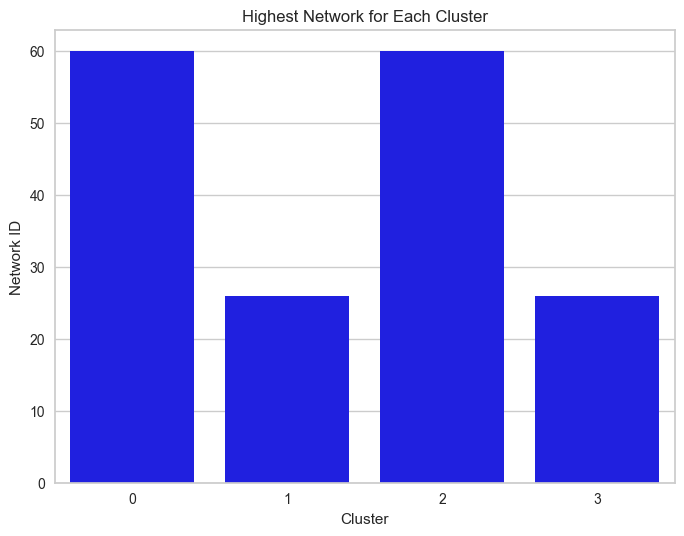

In [319]:

installs_grouped = merged_df_clusters.groupby(['cluster', 'network_id'])['install_id'].nunique().reset_index()
installs_grouped.rename(columns={'install_id': 'install_count'}, inplace=True)
installs_sorted = installs_grouped.sort_values(['cluster', 'install_count'], ascending=[True, False])
highest_networks = installs_sorted.groupby('cluster').first()['network_id']

print(highest_networks)
plt.figure(figsize=(8, 6))
sns.barplot(x=highest_networks.index, y=highest_networks.values, color='blue')
plt.title('Highest Network for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Network ID')
plt.show()


### For cluster 0 and cluster 2 , they are both install more using network ID 60 and For cluster 1 and cluster 3 , they are both install more using network ID 26

## 2. Are there any particular days of the week that have more revenue generated by each cluster?

In [300]:
merged_df_clusters

,install_id,revenue_usd,cluster,payout_usd,month_y,day_y,dayofweek_y,country_id,app_id,network_id,device_os_version,month,day,dayofweek
0,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1.62,2,0.710133,12,21,2,1,174,60,10,12,21,2
1,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1.62,2,3.571863,12,21,2,1,174,60,10,12,21,2
2,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1.62,2,3.583321,12,23,4,1,174,60,10,12,21,2
3,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1.62,2,0.361522,12,23,4,1,174,60,10,12,21,2
4,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1.89,2,0.710133,12,21,2,1,174,60,10,12,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344790,1d42d3d752004b6060eb32ade6aec7be5fcc4292013d5a...,1.89,2,4.626260,7,25,0,1,302,26,10,7,24,6
344791,afb7b014fdc1a8946abb7f444a03542bd4cb1457dfa4bf...,1.89,2,4.626260,7,25,0,1,302,26,10,7,24,6
344792,fec371dd56a5784283a85bab5a30fe859a36a3a1d6c4e7...,0.23,3,0.284250,2,18,4,109,154,26,11,2,17,3
344793,4423449a9b41bbc60c13ebf3a8f63491b1b9ec2c87f752...,1.89,2,0.689095,8,15,0,1,94,26,11,1,9,6


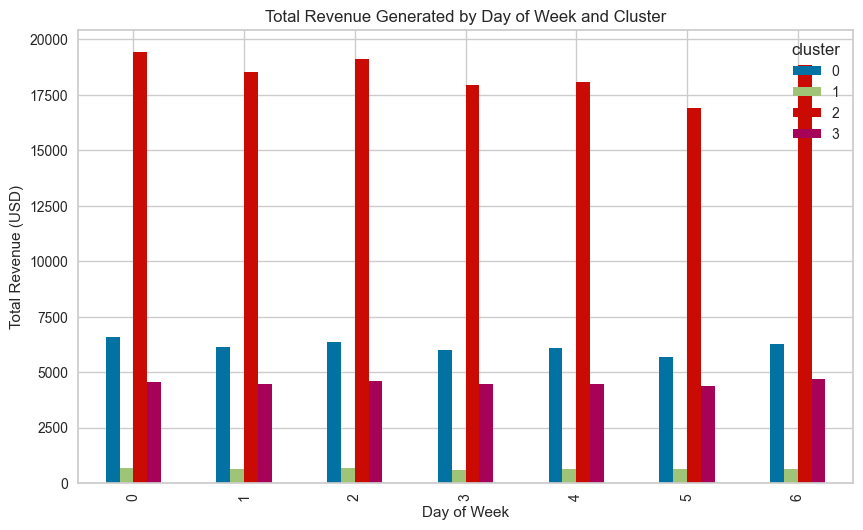

In [302]:



# Calculate the total revenue generated by each cluster for each day of the week
revenue_by_cluster_and_day = merged_df_clusters.groupby(['cluster', 'dayofweek_y'])['revenue_usd'].sum().reset_index()

# Pivot the data so that each cluster is a separate column
revenue_by_day_pivot = revenue_by_cluster_and_day.pivot(index='dayofweek_y', columns='cluster', values='revenue_usd')

# Visualize the results
revenue_by_day_pivot.plot(kind='bar', figsize=(10, 6))
plt.title('Total Revenue Generated by Day of Week and Cluster')
plt.xlabel('Day of Week')
plt.ylabel('Total Revenue (USD)')
plt.show()


### Cluster 2 is the most cluster with revenue all over the week

## What is the average revenue for each user in each cluster ?

In [304]:
cluster_avg_value = merged_df_clusters.groupby('cluster')['revenue_usd'].mean()
print(cluster_avg_value)

cluster
0    0.990910
1    0.029224
2    1.860206
3    0.399555
Name: revenue_usd, dtype: float64


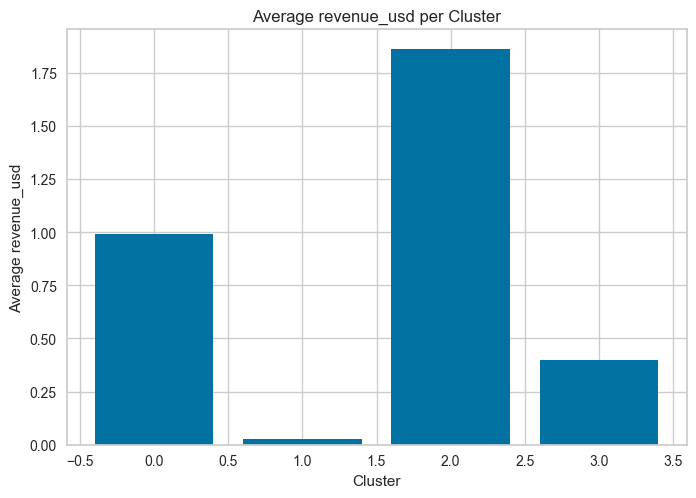

In [303]:

avg_values = merged_df_clusters.groupby('cluster')['revenue_usd'].mean()
fig, ax = plt.subplots()
ax.bar(avg_values.index, avg_values.values)
ax.set_xlabel('Cluster')
ax.set_ylabel('Average revenue_usd')
ax.set_title('Average revenue_usd per Cluster')
plt.show()


### Cluster 2 has the highest revenue per user and cluster 1 has the lowest revenue per user

## How does the app_id affect the cluster of the customer?

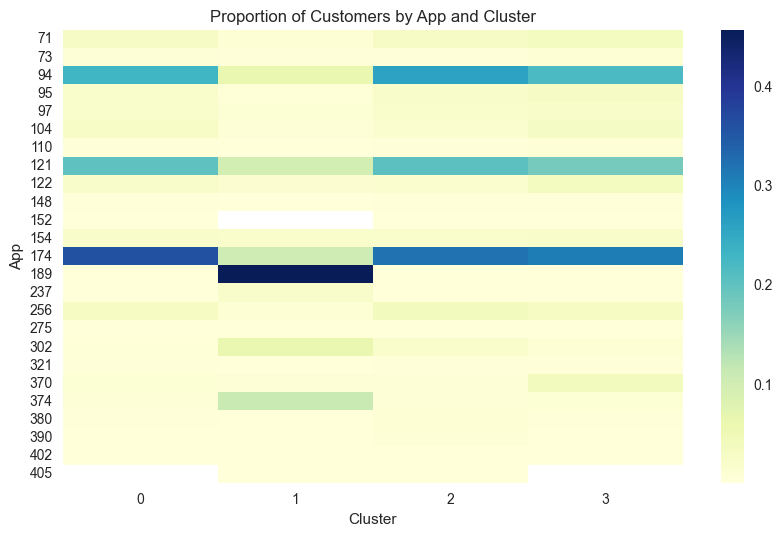

In [305]:

cluster_app_proportions = merged_df_clusters.groupby(['cluster', 'app_id']).size().unstack(level=0).apply(lambda x: x / x.sum(), axis=0)
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_app_proportions, cmap="YlGnBu")
plt.title("Proportion of Customers by App and Cluster")
plt.xlabel("Cluster")
plt.ylabel("App")
plt.show()

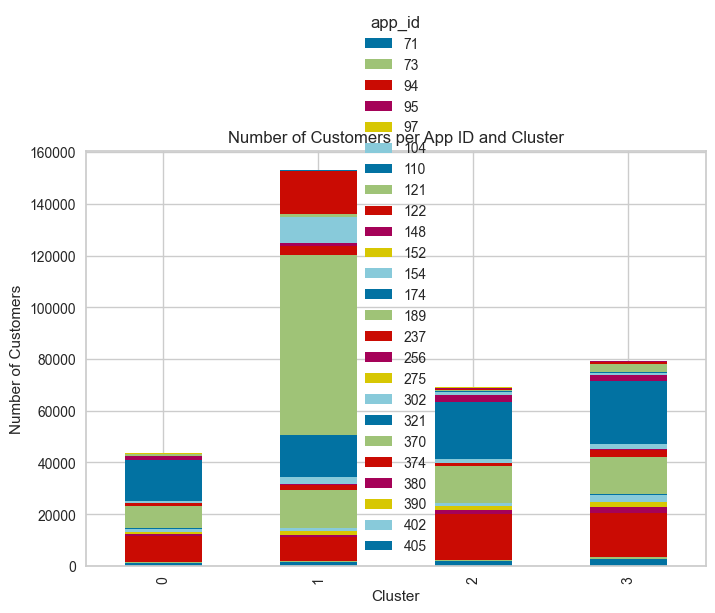

In [306]:

grouped_data = merged_df_clusters.groupby(['cluster', 'app_id']).size().reset_index(name='count')
pivot_table = grouped_data.pivot(index='cluster', columns='app_id', values='count').fillna(0)
pivot_table.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.title('Number of Customers per App ID and Cluster')

plt.show()


In [307]:
grouped_df = merged_df_clusters.groupby('cluster').agg({'install_id': 'nunique', 'payout_usd': 'sum'})
grouped_df['installs_to_payouts_ratio'] = grouped_df['install_id'] / grouped_df['payout_usd']
print(grouped_df)

         install_id     payout_usd  installs_to_payouts_ratio
cluster                                                      
0              7222   84940.859736                   0.085024
1              5924  169614.894987                   0.034926
2              9489  169174.598003                   0.056090
3             10235  130653.553077                   0.078337


## Cluster 1 is the lowest cluster for the ratio of installs to payouts and Cluster 0 is the highest cluster for the ratio of installs to payouts

In [309]:
merged_df_clusters

,install_id,revenue_usd,cluster,payout_usd,month_y,day_y,dayofweek_y,country_id,app_id,network_id,device_os_version,month,day,dayofweek
0,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1.62,2,0.710133,12,21,2,1,174,60,10,12,21,2
1,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1.62,2,3.571863,12,21,2,1,174,60,10,12,21,2
2,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1.62,2,3.583321,12,23,4,1,174,60,10,12,21,2
3,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1.62,2,0.361522,12,23,4,1,174,60,10,12,21,2
4,3e7bdaca309c5eea9d4004a0400b5a830f3963bddc71f8...,1.89,2,0.710133,12,21,2,1,174,60,10,12,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344790,1d42d3d752004b6060eb32ade6aec7be5fcc4292013d5a...,1.89,2,4.626260,7,25,0,1,302,26,10,7,24,6
344791,afb7b014fdc1a8946abb7f444a03542bd4cb1457dfa4bf...,1.89,2,4.626260,7,25,0,1,302,26,10,7,24,6
344792,fec371dd56a5784283a85bab5a30fe859a36a3a1d6c4e7...,0.23,3,0.284250,2,18,4,109,154,26,11,2,17,3
344793,4423449a9b41bbc60c13ebf3a8f63491b1b9ec2c87f752...,1.89,2,0.689095,8,15,0,1,94,26,11,1,9,6


## Is there any relation between device of the customers and their clusters ?

In [311]:
from scipy.stats import chi2_contingency
cont_table = pd.crosstab(merged_df_clusters["device_os_version"], merged_df_clusters["cluster"])


chi2, p_value, dof, expected = chi2_contingency(cont_table)

print("Chi-square statistic: ", chi2)
print("p-value: ", p_value)


Chi-square statistic:  11609.522418668521
p-value:  0.0


Text(0.5, 1.0, 'Operating System Usage by Customer Cluster')

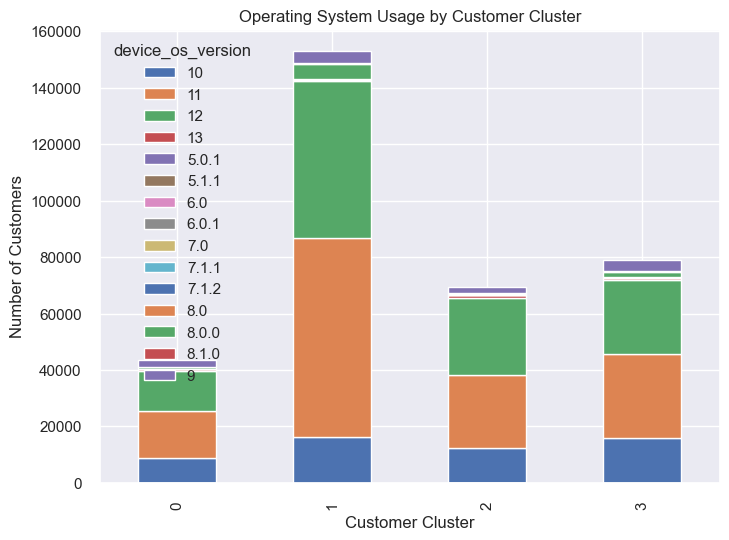

In [322]:

pivot = merged_df_clusters.pivot_table(index='cluster', columns='device_os_version', values='install_id', aggfunc='count')

# create stacked bar chart
sns.set(style='darkgrid')
ax = pivot.plot(kind='bar', stacked=True, figsize=(8,6))
ax.set_xlabel('Customer Cluster')
ax.set_ylabel('Number of Customers')
ax.set_title('Operating System Usage by Customer Cluster')


### p-value is less than the significance level (e.g., 0.05), then we reject the null hypothesis and conclude that there is a significant association between device_os_version and cluster. There is a correlation between both operating system and customer segments

## Is there any correlation between payout and cluster ?

In [313]:
from scipy.stats import pearsonr
corr, _ = pearsonr(merged_df_clusters['payout_usd'], merged_df_clusters['cluster'])

print('Correlation coefficient:', corr)

Correlation coefficient: 0.051084863193267147


##  How does the event_date affect the clusters of customers?

In [317]:
merged_df_clusters['event_date'] = pd.to_datetime('2022-' + merged_df_clusters['month'].astype(str) + '-' + merged_df_clusters['day'].astype(str))

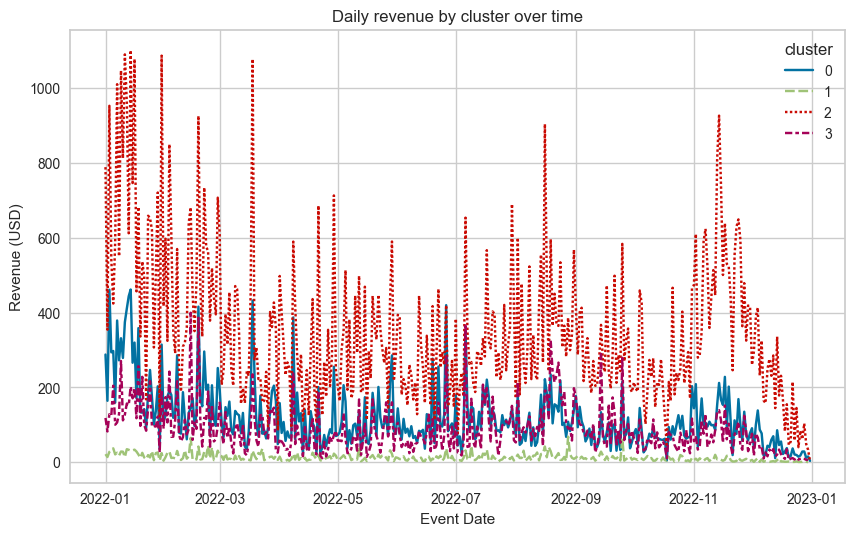

In [318]:

df_agg = merged_df_clusters.groupby(['event_date', 'cluster'])['revenue_usd'].sum().reset_index()

df_pivot = df_agg.pivot(index='event_date', columns='cluster', values='revenue_usd')

plt.figure(figsize=(10,6))
sns.lineplot(data=df_pivot)
plt.xlabel('Event Date')
plt.ylabel('Revenue (USD)')
plt.title('Daily revenue by cluster over time')
plt.show()


### We can see that our second segment of users is steady without any trends all over the year and with the lowest revenue all over the year  , Our first and forth segments have nearly the same trends all over the year with near revenues except some months our first cluster have scored higher revenue than the forth segment. Our third segment is the segment with the most revenue and with the biggest trends all over the year with big different than other segments 

  #### Thank you for reaching this part , have a nice day!